# **Data Science 실습: Wisconsin Breast cancer data**#
- 데이터프레임
- 로지스틱 회귀 분석 

# **유방암 데이터에 관한 설명**

%참고: https://tensorflow.blog/%ED%95%B4%EC%BB%A4%EC%97%90%EA%B2%8C-%EC%A0%84%ED%95%B4%EB%93%A4%EC%9D%80-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-2/  

> 이제까지는 수치 값을 예측하는 회귀 분석을 예제로 삼아 봤는데요. 머신러닝의 주요한 또 하나의 예인 분류(Classification)를 사용해 보도록 하겠습니다. 분류는 결과가 숫자가 아니고 참, 거짓 같은 두가지 혹은 여러가지 종류로 구분하는 문제입니다. 이런 출력 값의 여러 종류를 지칭할 때 레이블(label) 혹은 클래스(class)라고 부릅니다. 그래서 여기서는 수치 출력 값을 가진 당뇨병 데이터를 사용할 수 없고 사이킷런에서 제공하는 다른 데이터인 유방암 데이터를 사용하겠습니다.  


> 사이킷런에 포함된 유방암 데이터는 위스콘신(Wisconsin) 대학에서 나온 데이터로 569개의 데이터가 있고 30개의 특성(feature)이 있습니다. 데이터를 로드하고 각 특성의 이름과 구조를 살펴 보겠습니다.  


- 예제 코드:  
  > from sklearn import datasets  
    cancer = datasets.load_breast_cancer()  
    print(cancer.data.shape)  
    print(cancer.feature_names)  
    print(cancer.target_names)  
    (569, 30)

- 컬럼(columns)에 대한 내용:  
  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']  
 ['malignant' 'benign']  

 > (1) 30개의 특성은 세포특징을 10가지로 측정하고 각각의 평균과 편차, 최대 이상치를 기록한 것입니다.  
 > (2) 출력은 암에 대해 악성인지(0)와 양성인지(1)로 구분하고 있습니다. 양성의 의미는 세포에 이상이 없다는 의미입니다.  
 > (3) 우리는 cancer 데이터의 8번째 즉 ‘mean concave points’ 만을 사용하여 악성과 양성을 구분해 보려고 합니다.  
 > (4)‘mean concave points’는 세포에 움푹 패인 곳의 횟수를 평균낸 것입니다. 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import os
import io     # about io.BytesIO()

plt.rcParams['axes.unicode_minus'] = False # about '-' font issue
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.style.use('fast')

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer 

# **데이터셋 불러오기**
(1) 라이브러리에서 제공하는 데이터셋 사용  
(2) 로컬드라이브에서 파일 업로드하기

In [ ]:
# Dataset loading :
cancer = load_breast_cancer()  # 라이브러리에서 제공하는 데이터셋을 사용하는 경우

# # 로컬 컴퓨터에서 파일 업로드하기
# from google.colab import files
# myfile = files.upload()
# cancer = pd.read_csv(io.BytesIO(myfile['bca_data.csv']))

# **데이터프레임 생성**
(1) pd.DataFrame()

In [ ]:
df = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
df['target'] = cancer['target']
print(df.shape)   # (rows, columns)
df.head(5)

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# **데이터 전처리**
- StandardScaler 클래스 사용:
  - 우선, 객체 생성하기: scaler = StandardScaler()  
  - fit_transform() 사용: scaler.fit_transform()
  > fit_transform(): 저장된 데이터의 평균을 0으로 표준편차 1로 변환

- DataFrame.drop() 함수:(https://www.w3resource.com/pandas/dataframe/dataframe-drop.php)
  - It is used to drop specified labels from rows(axis=0 & index=0) or columns(axis=1 & index = 1). 
  - Syntax: DataFrame.drop(self, labels=None, axis=0, index=None, columns=None, level=None, iplace=False, errors='raise')

> (1) sklearn.preprocessing includes the following classes:
    - StandardScaler
    - RobustScaler
    - PolynominalFeatures
    - FunctionTransformer 
   (참고: https://velog.io/@tonyhan18/2-1-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%A0%84%EC%B2%98%EB%A6%AC-%EA%B8%B0%EC%B4%88)


In [ ]:
# Standardization (표준화) : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
scaler = StandardScaler()
scaled = scaler.fit_transform(df.drop('target', axis=1))

# **데이터셋 구성**
(1) train_test_split() 

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(scaled, df['target'], random_state=10)

In [ ]:
print(x_train.shape)
print(x_valid.shape)

(426, 30)
(143, 30)


# **Logistic regression(클래스라는 것을 기억!) 분석**
(1) LogisticRegression 클래스 객체 생성하기: lr_clf = LogisticRegression()  
(2) training 데이터에 fit()함수 적용하여 회귀분석(예측) 모델 생성하기: lr_clf.fit(training_data(X), labeled_data(Y))  
(3) validation data를 이용하여 모델에 적용하여 결과 예측하기: lr_clf.predict(validation_data)  

In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_valid)

# **예측 결과에 대한 정확도 분석**
(1) 정확도 측정 : accuracy_score(y_valid, pred)

In [ ]:
acc_value = accuracy_score(y_valid, pred)
print("accuracy score =", acc_value)
percent_value = acc_value * 100
print("percentage value[%] =", percent_value)

accuracy score = 0.958041958041958
percentage value[%] = 95.8041958041958


# **오차행렬(Confusion Matrix)**


In [ ]:
from sklearn.metrics import confusion_matrix
from IPython.display import Image

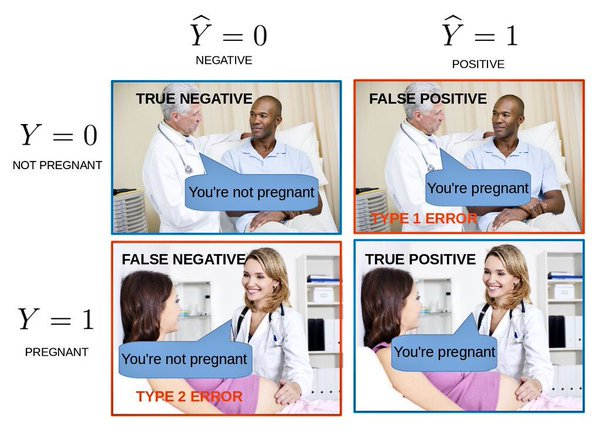

In [ ]:
Image('https://skappal7.files.wordpress.com/2018/08/confusion-matrix.jpg', width=700)  # 와 정말 잘 외워지는 그림! 

In [ ]:
cm_array = confusion_matrix(y_valid, pred)
cm_array

array([[50,  2],
       [ 4, 87]])

Text(33.0, 0.5, 'Actual')

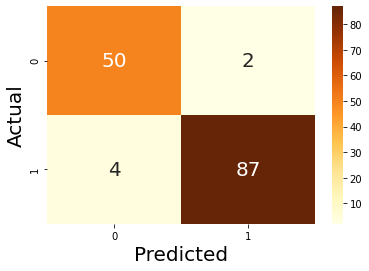

In [ ]:
sns.heatmap(cm_array, annot = True, annot_kws = {"size": 20}, cmap = 'YlOrBr')
plt.xlabel('Predicted', fontsize = 20)
plt.ylabel('Actual', fontsize = 20)

# **Confusion Matrix 분석**  
(1) 새로운 기기의 진단(예측) 정확성 측정 :  
- 민감도(Sensitivity) => Se = TP / (TP + FP)  
  > 예) 
- 특이도(Specificity) => Sp = TN / (TN + FN)  
  > 예) 

(2) 신뢰성 평가 : F1-score, AUC  

In [ ]:
TN, FP, FN, TP = cm_array.ravel()
print("True Negative (진음성) =", TN)
print("False Positive (위양성) =", FP)
print("False Negative (위음성) =", FN)
print("True Positive (진양성) =", TP)

True Negative (진음성) = 50
False Positive (위양성) = 2
False Negative (위음성) = 4
True Positive (진양성) = 87
